In [1]:
import sys
sys.path.append("..")

# Power spectral density simulation

JingYu Ning

2023 04 30

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from gwinc.transfer_matrices import Squeezer, FilterCavity, Readout
from gwinc.transfer_matrices import build_transfer_matrix
from gwinc.noise import build_noise

## Build transfer matrix

The following code builds the transfer matrices for the propagation of vacuum fields $\mathcal{v}_1$ 
through the squeezer and injection optics, 
its modification by the filter cavity and the influence it experiences due imperfect mode matching, 
and the readout of the homodyne measurement.

$$\mathcal{T} = \mathcal{T}_{ro} \mathcal{T}_{fc+mm} \mathcal{T}_{inj}$$

where

$\mathcal{T}_{ro} = \tau_{ro} \mathcal{I}$

$\mathcal{T}_{fc+mm} = (t_{00} \mathcal{T}_{fc} + \mathcal{T}_{mm})$

and 

$\mathcal{T}_{inj} = \tau_{inj} \mathcal{S}(\sigma_{sqz}, \phi_{sqz})$

In [3]:
transfer_matrix = build_transfer_matrix([
    Squeezer(
        squeezing_factor = 10,
        squeezing_angle = 0,
        squared_injection_loss = 0.32
    ),
    FilterCavity(
        squared_input_mirror_transmission = 0.00136,
        squared_round_trip_loss = 120e-6,
        filter_cavity_length = 300,
        carrier_wavelength = 1064,
        detuning = 0.1,
        filter_cavity_length_error = 0,
        sum_of_all_squeezed_filter_cavity_higher_order_mode_coupling_coefficients = 0.06,
        sum_of_all_squeezed_local_oscillator_higher_order_mode_coupling_coefficients = 0.02,
        mode_mismatch_phase_ambiguity = 2*np.pi
    ),
    Readout(
        squared_readout_loss = 0.06
    )
])

## Build the power spectral density

The following code builds the power spectral density of quantum noise in the signal quadrature relative to coherent vacuum.

In [4]:
noise = build_noise(
    transfer_matrix = transfer_matrix, 
    measurement_amplitude = 1, 
    measurement_phase = 0.1 * np.pi/180
)

## Result

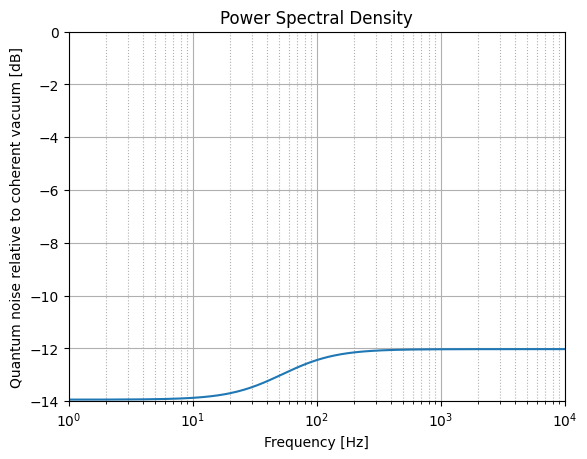

In [5]:
plt.xscale("log")
plt.grid(which = "major", linestyle = "solid")
plt.grid(which = "minor", linestyle = "dotted")
plt.xlim(1, 10000)
plt.ylim(-14, 0)
plt.title("Power Spectral Density")
plt.ylabel("Quantum noise relative to coherent vacuum [dB]")
plt.xlabel("Frequency [Hz]")

frequencies = np.linspace(0, 10000, 10000)
plt.plot(
    frequencies, 
    [10*np.log10(noise(2*np.pi*f)) for f in frequencies],
)